# Case Study #09 - Unsupervised Learning
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\ADAM\Downloads\Wine.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 13)

In [4]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [6]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

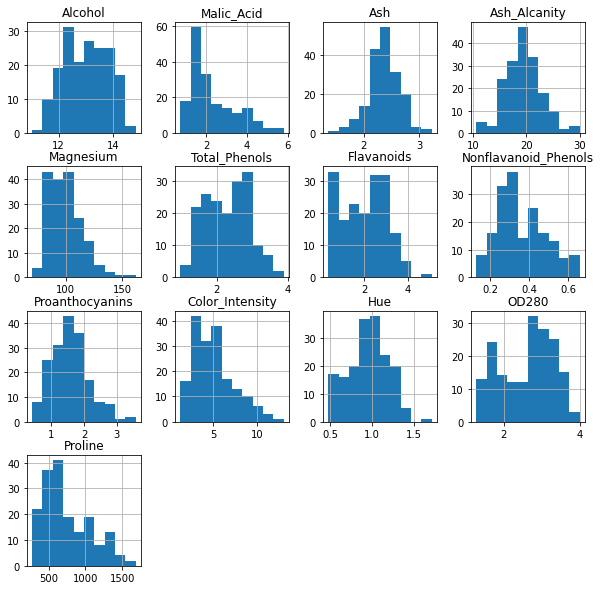

In [7]:
data.hist(figsize =(10,10))
plt.show()

In [8]:
import warnings
warnings.filterwarnings('ignore')

IndexError: index 9 is out of bounds for axis 0 with size 9

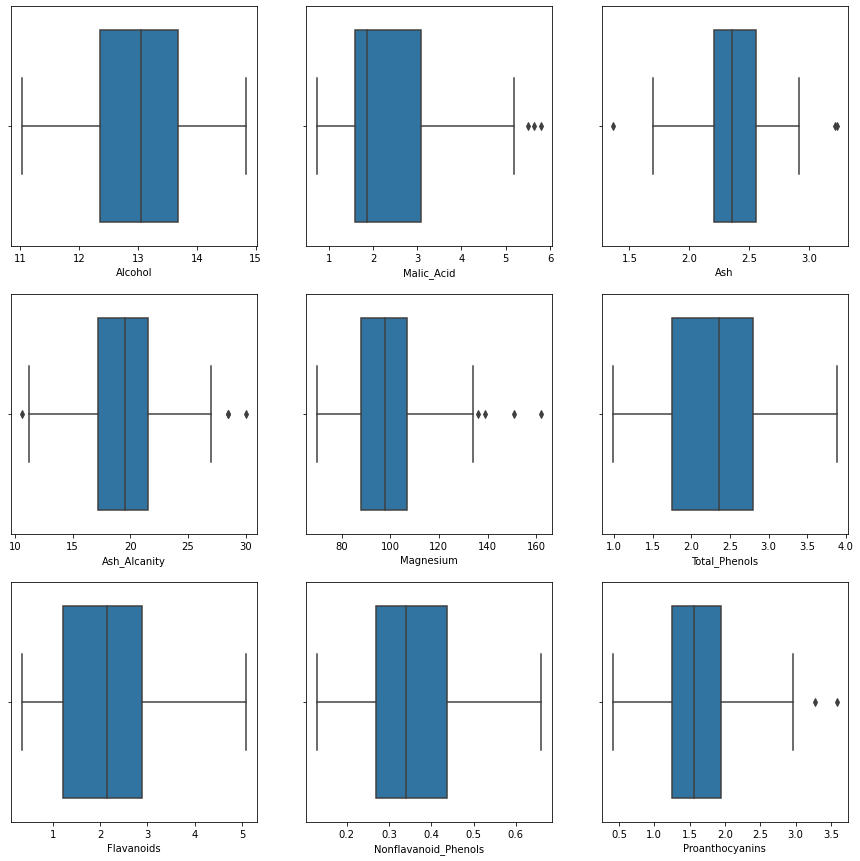

In [9]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,15))
ax=ax.flatten()
int_cols= data.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(data[i], ax=ax[x])
plt.show()

In [10]:
data1=data.copy()
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(data1)

In [12]:
from sklearn.cluster import KMeans
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,init="k-means++",random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
print(inertia)

[2313.9999999999986, 1659.0079672511504, 1277.928488844643, 1175.7051928197127, 1104.861683962532, 1042.3872037251417, 988.0533283180057, 940.708165089653, 902.0783170433883, 866.7991687164842]


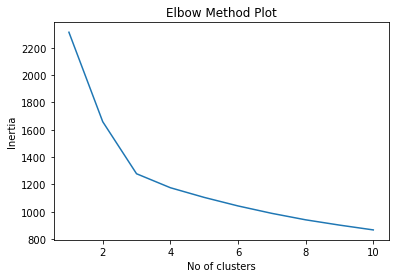

In [13]:
plt.plot(ks,inertia)
plt.title("Elbow Method Plot")
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [14]:
model_kmeans=KMeans(n_clusters=2)
model_kmeans.fit(scaled_data)
km=model_kmeans.predict(scaled_data)
print(model_kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0
 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [15]:
data1['KMean_ClusterID']= pd.Series(km)
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMean_ClusterID
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


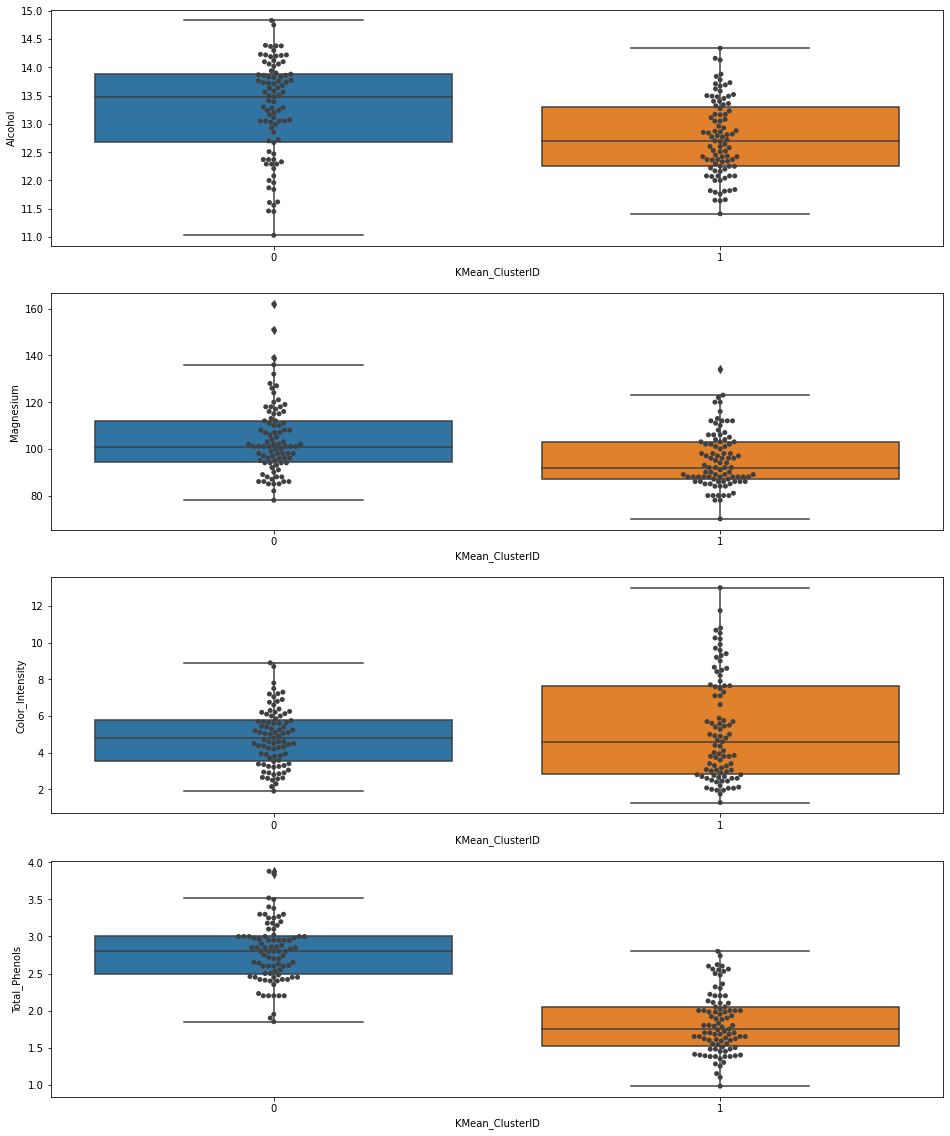

In [27]:
fig, (ax2,ax3,ax4,ax5) = plt.subplots(nrows = 4)
fig.set_figwidth(16)
fig.set_figheight(20)
x = sns.boxplot(x="KMean_ClusterID", y='Alcohol', data=data1, ax= ax2)
x = sns.swarmplot(x="KMean_ClusterID", y='Alcohol', data=data1,color=".25",ax= ax2)
x = sns.boxplot(x="KMean_ClusterID", y='Magnesium', data=data1, ax= ax3)
x = sns.swarmplot(x="KMean_ClusterID", y='Magnesium', data=data1,color=".25",ax= ax3)
x = sns.boxplot(x="KMean_ClusterID", y='Color_Intensity', data=data1, ax= ax4)
x = sns.swarmplot(x="KMean_ClusterID", y='Color_Intensity', data=data1,color=".25",ax= ax4)
x = sns.boxplot(x="KMean_ClusterID", y='Total_Phenols', data=data1, ax= ax5)
x = sns.swarmplot(x="KMean_ClusterID", y='Total_Phenols', data=data1,color=".25",ax= ax5)

In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy score for kmeans algorithm is",accuracy_score(km,data1['KMean_ClusterID'] ))

Accuracy score for kmeans algorithm is 1.0


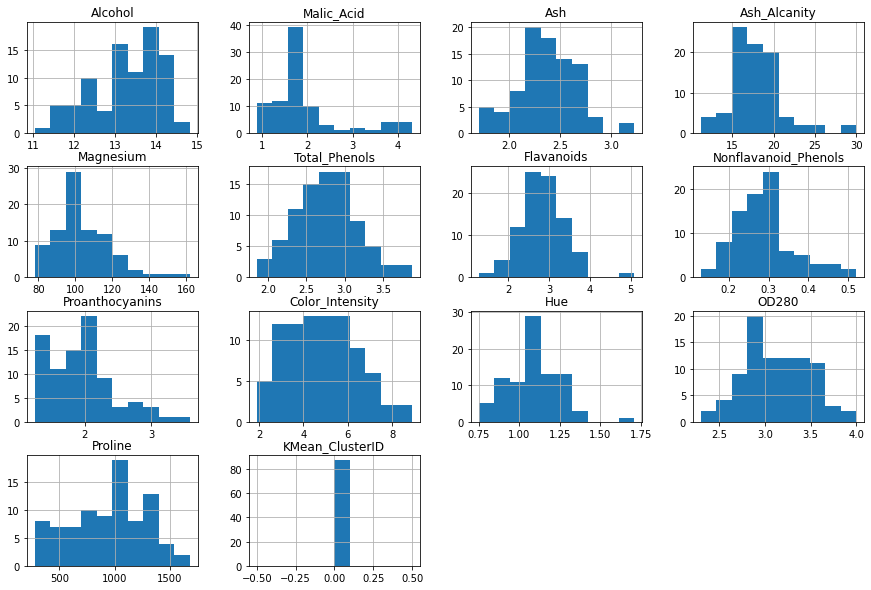

In [30]:
data1[data1['KMean_ClusterID'] == 0].hist(figsize = (15,10))
plt.show()

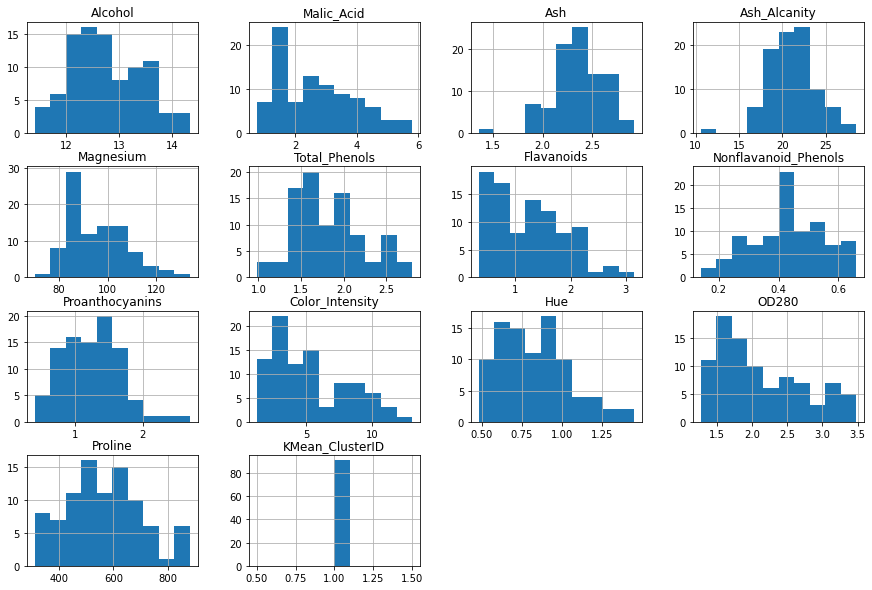

In [31]:
data1[data1['KMean_ClusterID'] == 1].hist(figsize = (15,10))
plt.show()

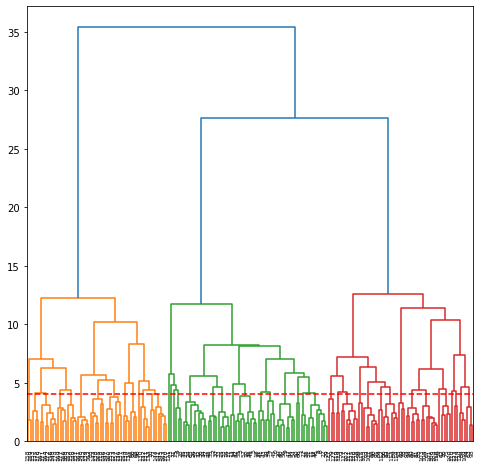

In [32]:
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize = (8,8))
dendro = linkage(scaled_data,method = 'ward')
dendrogram(dendro, leaf_rotation = 90, leaf_font_size = 6)
plt.hlines(4,0,27000,colors="red",linestyles="dashed")
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(data1)
data1['HA_ClusterID']= pd.Series(labels)
labels

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

In [40]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data1,labels,metric='euclidean',random_state=42)
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.564
